https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import datasets, model_selection

# from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cross_validation import cross_val_score

import seaborn as sns

from mlxtend.plotting import plot_decision_regions

### データを用意

In [26]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

### SVM でクロスバリデーション ＆ グリッドサーチ

Best parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation: 0.809282396360065


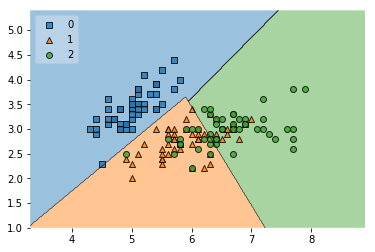

In [33]:

tuned_parameters = [
    #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    #{'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    #{'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
]

score = 'f1_weighted'
grid_search = GridSearchCV(
    SVC(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=5, # 交差検定の回数
    n_jobs=2,
    scoring=score) # モデルの評価関数の指定

grid_search.fit(X, y)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation: {}'.format(grid_search.best_score_))

plot_decision_regions(X, y, clf=grid_search, legend=2)

# テストデータで検証
#print('Test set score: {}'.format(grid_search.score(data_test, label_test)))


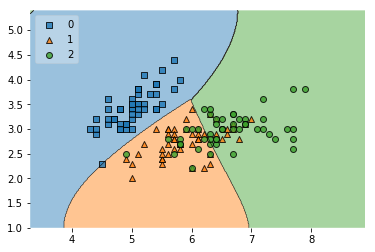

In [28]:
svm = SVC()
svm.fit(X,y)

plot_decision_regions(X=X, y=y, clf=svm, legend=2)
